#单位区和功能区分类

In [1]:
from mmpretrain import get_model
from mmpretrain import ImageClassificationInferencer
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
model = get_model("/home/u2021213565/jupyterlab/manholecover_recognition_mmpretrain/manhole_configs/vit-base-p16_1xb128-coslr-ft_custom_unit.py", pretrained="/home/u2021213565/jupyterlab/manholecover_recognition_mmpretrain/mmpretrain/work_dirs/vit-base-p16_1xb128-coslr-ft_custom_unit/epoch_69.pth")
inferencer = ImageClassificationInferencer(model)

Number of classes: 24
07/14 16:11:04 - mmengine - INFO - Because batch augmentations are enabled, the data preprocessor automatically enables the `to_onehot` option to generate one-hot format labels.
Loads checkpoint by local backend from path: /home/u2021213565/jupyterlab/manholecover_recognition_mmpretrain/mmpretrain/work_dirs/vit-base-p16_1xb128-coslr-ft_custom_unit/epoch_69.pth


In [3]:
result = inferencer('/home/u2021213565/jupyterlab/images_dataset_resnet_train/0/val/0-北京电信/0-北京电信_MVIMG_20240630_163708.jpg')[0]
print(result['pred_class'])

/home/u2021213565/.conda/envs/mmlab/lib/python3.8/site-packages/rich/live.py:231: UserWarning: install "ipywidgets"
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

0-市政工程


The predicted class for the image is: 0-市政工程


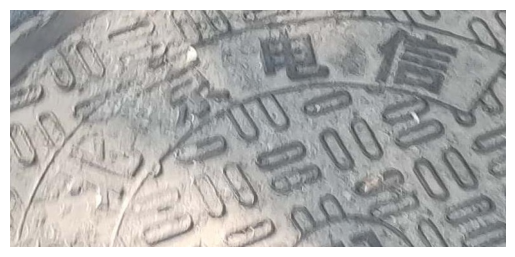

In [4]:
img_path = '/home/u2021213565/jupyterlab/images_dataset_resnet_train/0/val/0-北京电信/0-北京电信_MVIMG_20240630_163708.jpg'
input_image = Image.open(img_path)
predicted_class = inferencer(img_path)[0]
print(f'The predicted class for the image is: {predicted_class["pred_class"]}')

# 显示原始图片
plt.imshow(input_image)
plt.axis('off')  # 不显示坐标轴
plt.show()

/home/u2021213565/.conda/envs/mmlab/lib/python3.8/site-packages/rich/live.py:231: UserWarning: install "ipywidgets"
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Accuracy: 0.7250


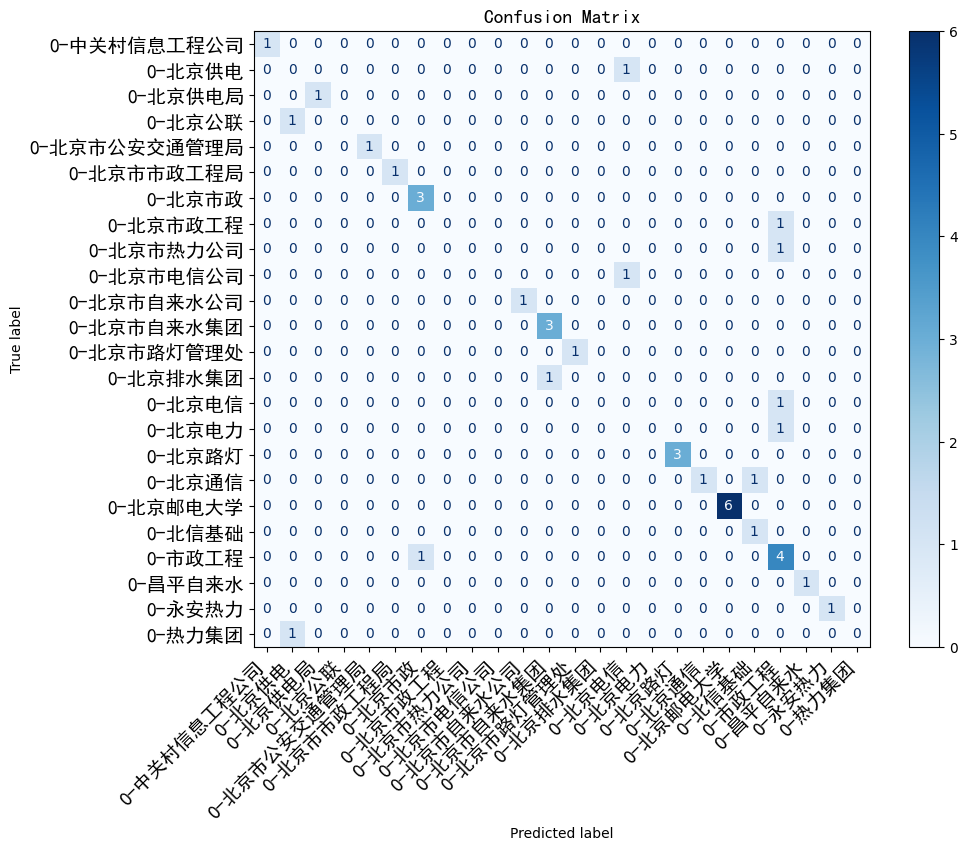

In [5]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 假设inferencer函数已经定义
# from your_inference_module import inferencer

# 定义路径和字体
val_dir = '/home/u2021213565/jupyterlab/images_dataset_resnet_train/0/val'
font = FontProperties(fname="./SimHei.ttf", size=14)

# 初始化变量
true_labels = []
pred_labels = []
class_names = sorted(os.listdir(val_dir))  # 获取所有类名

# 遍历目录
for class_name in class_names:
    class_dir = os.path.join(val_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        input_image = Image.open(img_path)
        
        # 进行推理
        predicted_class = inferencer(img_path)[0]["pred_class"]
        
        # 记录真实标签和预测标签
        true_labels.append(class_name)
        pred_labels.append(predicted_class)

# 计算准确率
accuracy = accuracy_score(true_labels, pred_labels)
print(f'Accuracy: {accuracy:.4f}')

# 计算混淆矩阵
cm = confusion_matrix(true_labels, pred_labels, labels=class_names)

# 绘制混淆矩阵
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=True)

# 设置字体
ax.set_xticklabels(class_names, fontproperties=font, rotation=45, ha="right")
ax.set_yticklabels(class_names, fontproperties=font, rotation=0)

plt.title('Confusion Matrix', fontproperties=font)
plt.show()
